In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

# 1. Hearts Diseases EDA

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

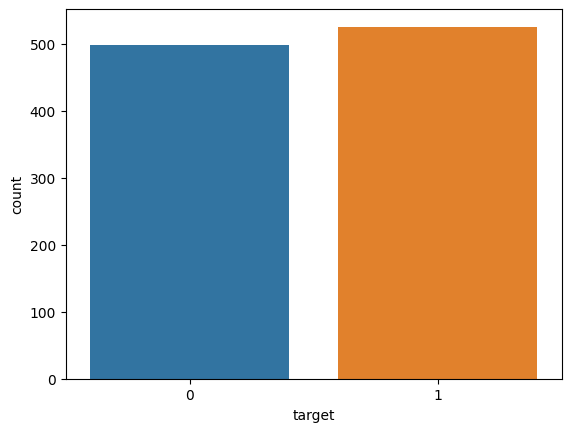

In [6]:
sns.countplot(x = 'target', data = df);

Среднее количество людей с заболеванием сердца:

In [7]:
df['target'].mean()

0.5132

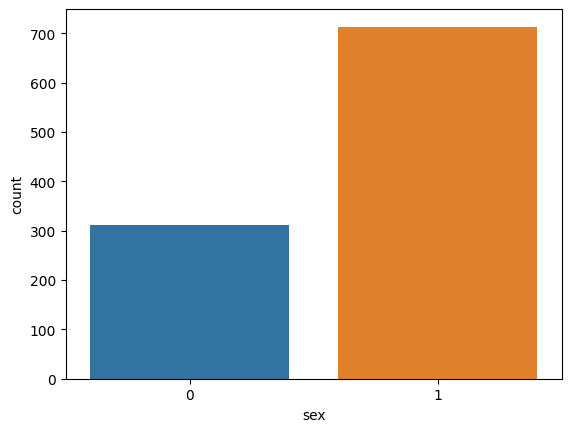

In [8]:
sns.countplot(x = 'sex', data = df);

Количество мужчин, прошедших исследование, более, чем в два раза превышает количество женищин.

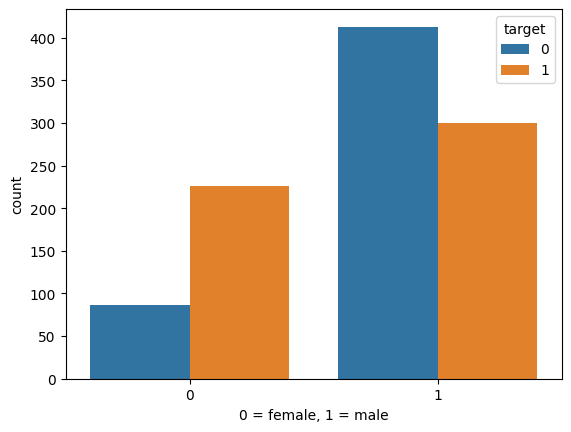

In [9]:
sns.countplot(x = 'sex', hue = 'target', data = df);
plt.xlabel('0 = female, 1 = male');

Видим, что в процентном соотношении женщины сильнее подвержены заболеваниям сердца.

In [10]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

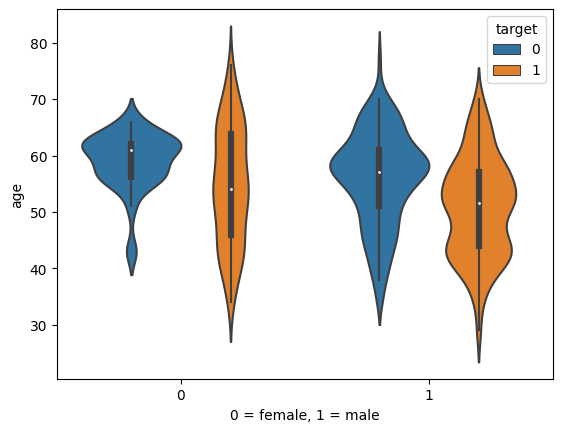

In [11]:
sns.violinplot(y = 'age', x = 'sex', hue = 'target', data = df);
plt.xlabel('0 = female, 1 = male');

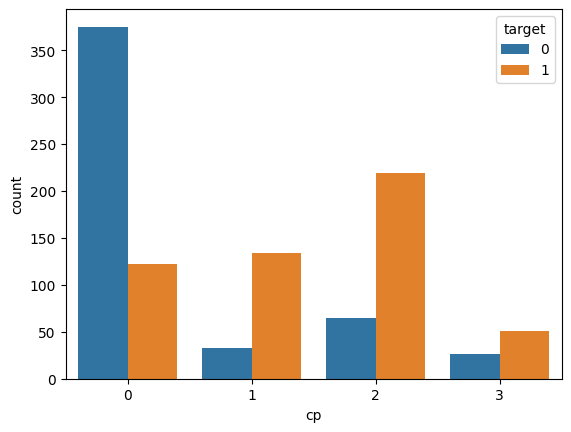

In [12]:
sns.countplot(x = 'cp', hue = 'target', data = df);

In [13]:
pd.crosstab(df['cp'], df['target'], margins = True).style.background_gradient()

target,0,1,All
cp,,,
0,375,122,497
1,33,134,167
2,65,219,284
3,26,51,77
All,499,526,1025


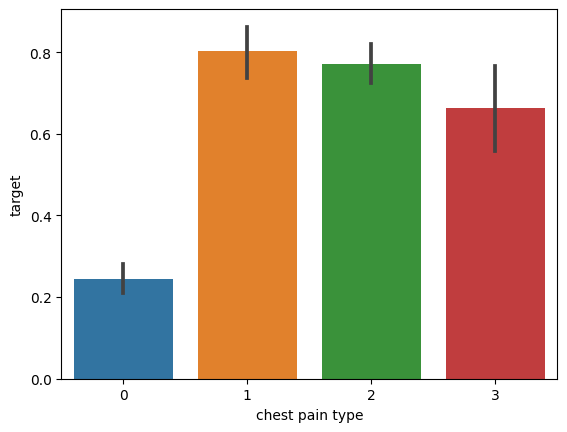

In [14]:
sns.barplot(x = "cp", y = "target", data = df);
plt.xlabel('chest pain type');

Грудная боль 3 типа является самой редкой. Большинство людей, имеющих проблемы с сердцем имеют либо 1, либо 2 тип боли. Люди с типом боли в груди 0 являются самой многочисленной группой, и в большинстве не подвержены проблемам сердца.

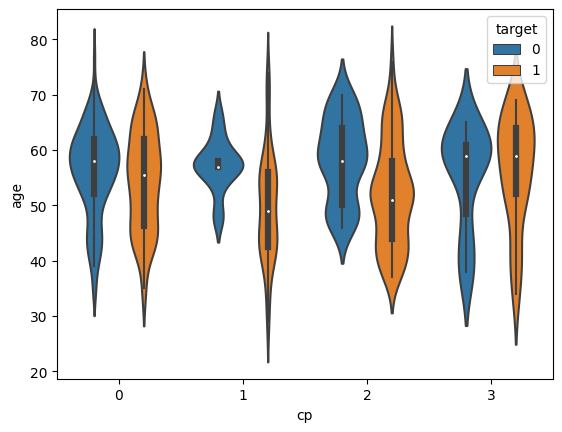

In [15]:
sns.violinplot(x = 'cp', y = 'age', hue = 'target', data = df);

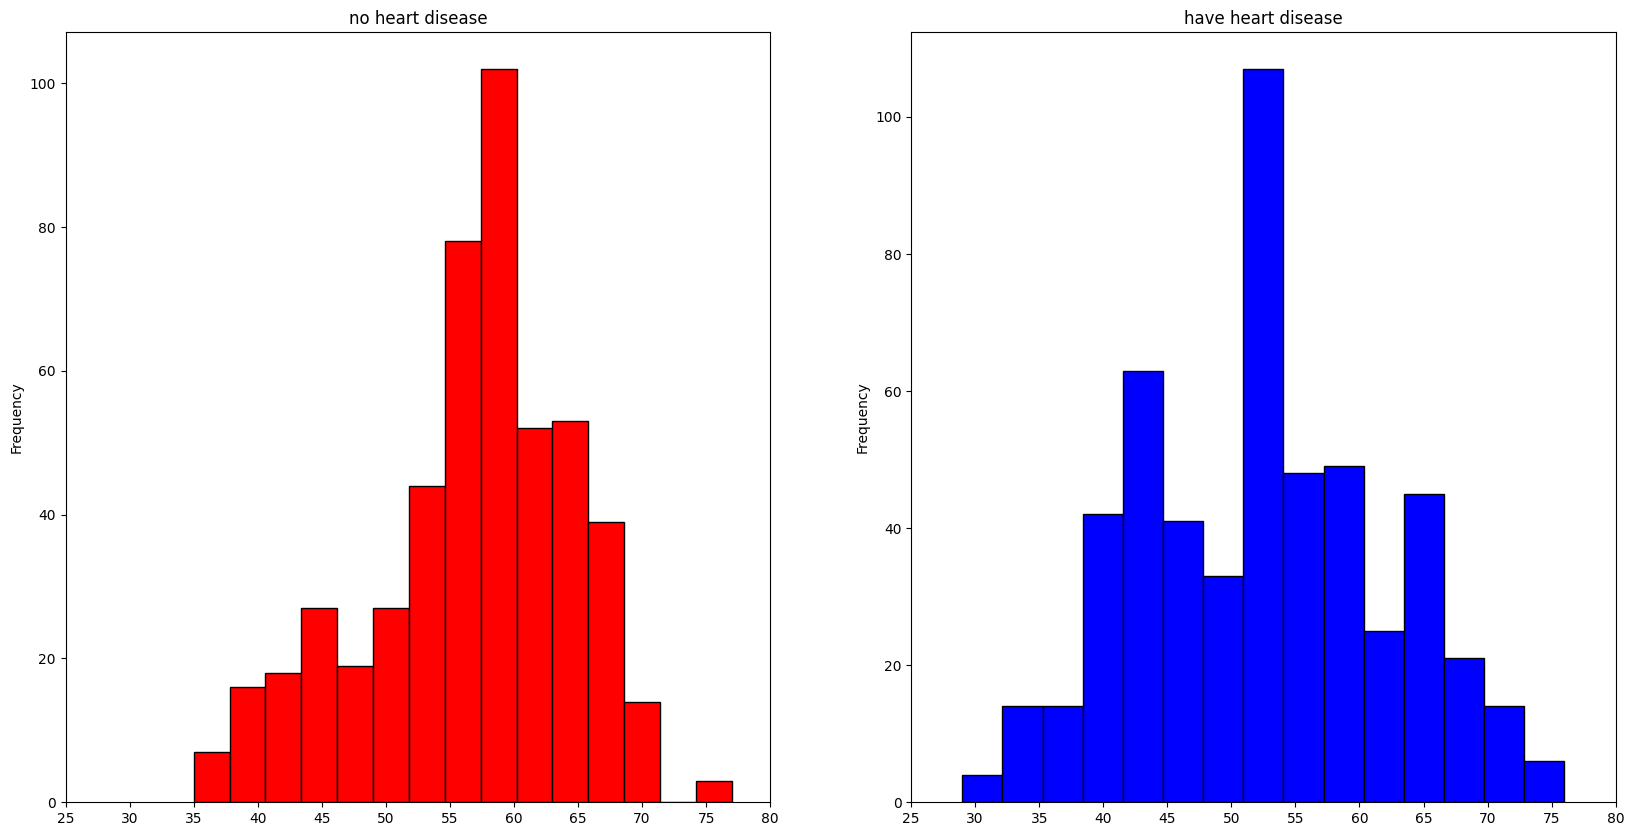

In [16]:
_, ax = plt.subplots(1, 2, figsize=(20, 10))
df[df['target'] == 0]['age'].plot.hist(ax=ax[0], edgecolor='black', color='red', bins=15)
ax[0].set_title('no heart disease')
x1 = list(range(25, 85, 5))
ax[0].set_xticks(x1)
df[df['target'] == 1].age.plot.hist(ax=ax[1],color='blue',edgecolor='black', bins=15)
ax[1].set_title('have heart disease')
x2 = list(range(25, 85, 5))
ax[1].set_xticks(x2)
plt.show()

Больше всего имеют проблемы с сердцем люди в возрасте 54 года. 

60-летние, прошедшие обследование, в наименьшей степени подвержены сердечным болезням.

Самы старый участник обследования не имеет проблем с сердцем.

In [17]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

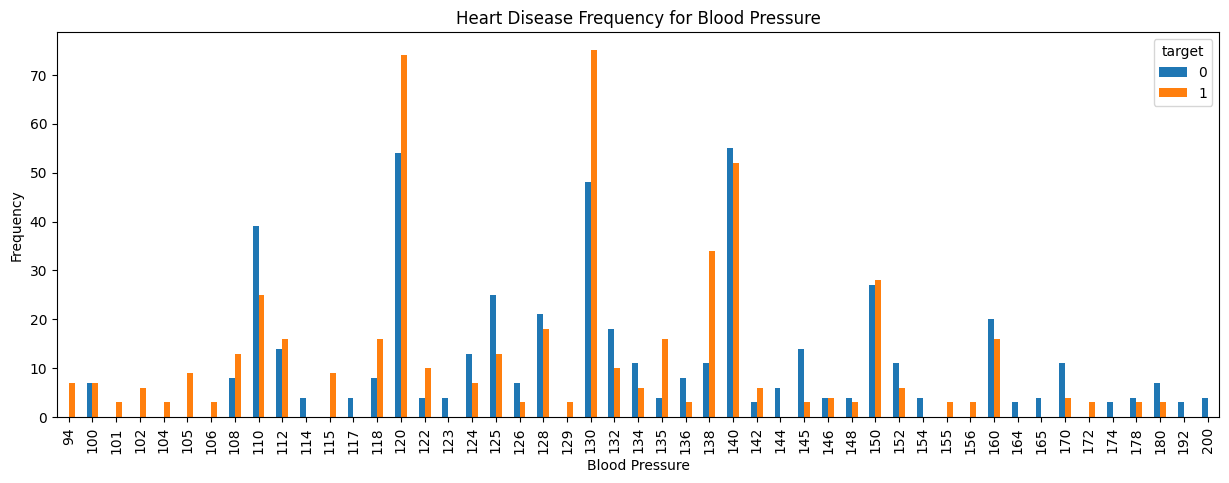

In [18]:
pd.crosstab(df['trestbps'], df['target']).plot(kind="bar", figsize=(15, 5))
plt.title('Heart Disease Frequency for Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

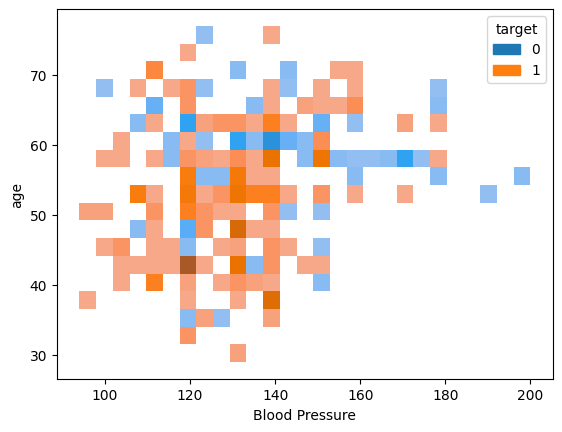

In [19]:
sns.histplot(x = 'trestbps', y = 'age', hue = 'target', data = df)
plt.xlabel('Blood Pressure')
plt.show()

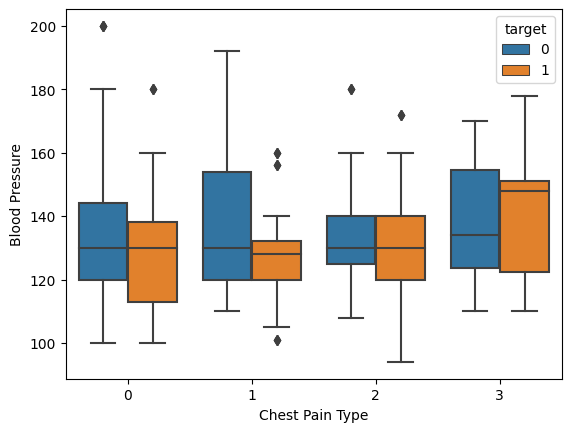

In [20]:
sns.boxplot(x = 'cp', y = 'trestbps', hue = 'target', data = df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Blood Pressure')
plt.show()

Человек с наименьшим давлением моложе 40 лет и имеет проблемы с сердцем.

Самое высокое давление было выявлено у человека 55 лет, не имеющего сердечных заболеваний.

120-140 мм. рт. ст. самое частое давение среди испытуемых.

Люди с 3 типом грудной боли имеют примерно одинаковое давление.

Люди с 1 типом боли в груди имеют более высокое среднее давление, если они не подвержены заболеваниям сердца.

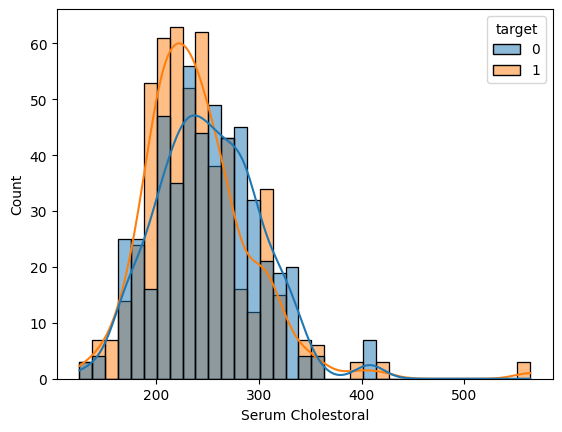

In [21]:
sns.histplot(x = 'chol', hue = 'target', kde = True, data = df)
plt.xlabel('Serum Cholestoral')
plt.show()

Видим, что у людей, имеющих проблемы с сердцем, содержание холестерина выше, чем у здоровых людей.

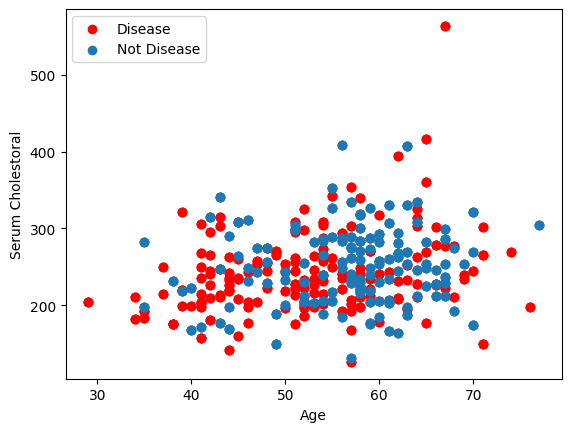

In [22]:
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Serum Cholestoral")
plt.show()

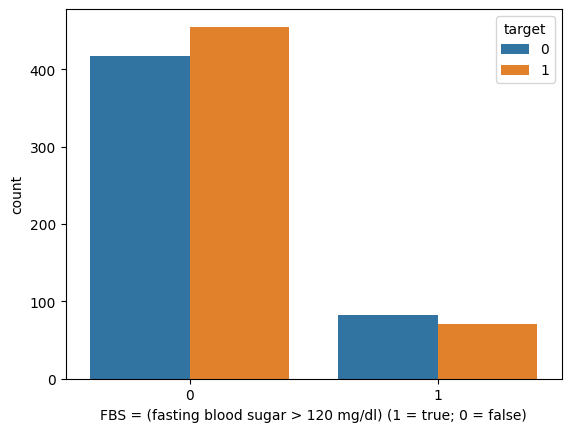

In [23]:
sns.countplot(x = 'fbs', hue = 'target', data = df);
plt.xlabel('FBS = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)');

В основном, содержание сахара у всех в норме. В обеих группах по содержанию сахара 
примерно одинаковое количество сердечно-больных и здоровых.

In [24]:
pd.crosstab(df['restecg'], df['target']).style.background_gradient()

target,0,1
restecg,,
0,283,214
1,204,309
2,12,3


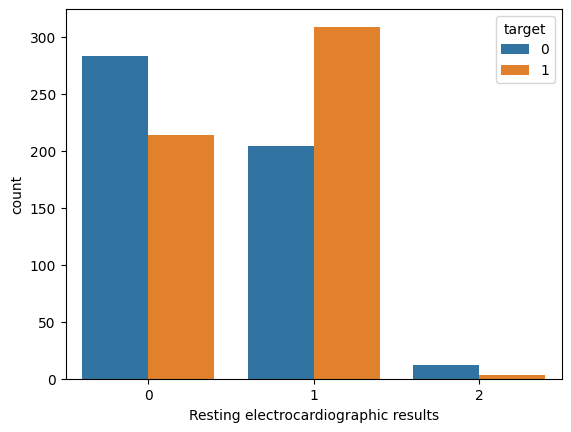

In [25]:
sns.countplot(x = 'restecg', hue = 'target', data = df);
plt.xlabel('Resting electrocardiographic results');

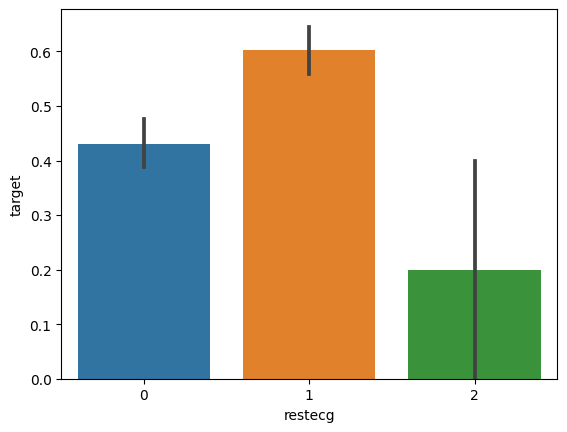

In [26]:
sns.barplot(x = 'restecg', y = 'target', data = df);

Результат кардиографии в покое 1 основной у людей, страдающих заболеванием сердца.

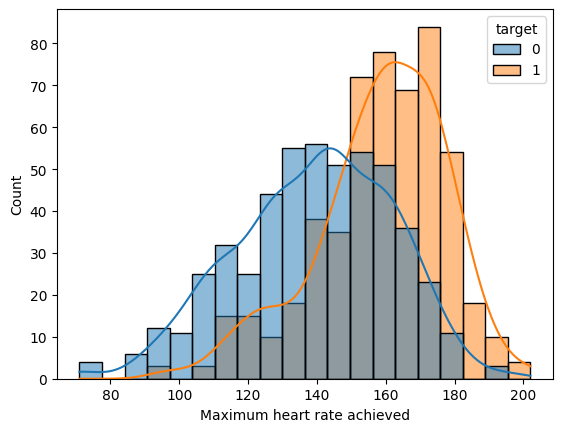

In [27]:
sns.histplot(x = 'thalach', hue = 'target', kde = True, data = df)
plt.xlabel('Maximum heart rate achieved')
plt.show()

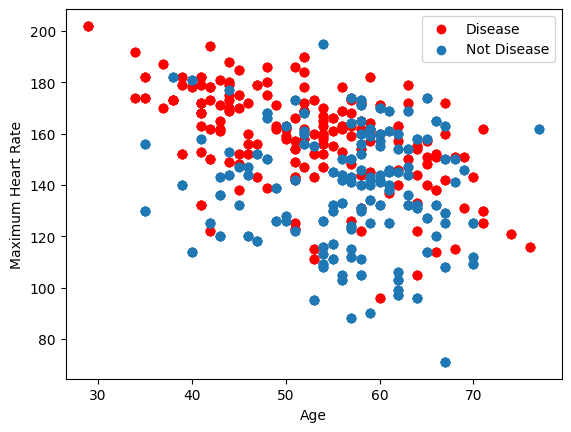

In [28]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

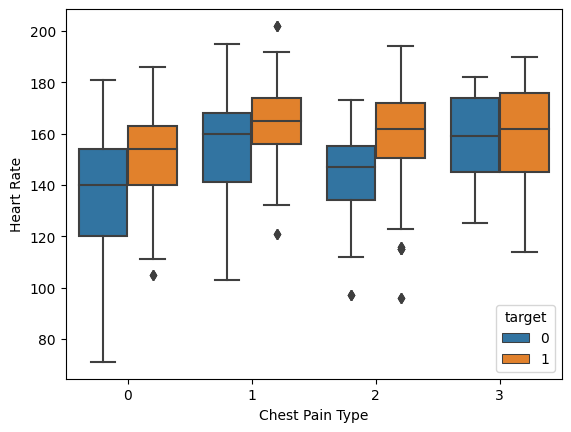

In [29]:
sns.boxplot(x = 'cp', y = 'thalach', hue = 'target', data = df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Heart Rate')
plt.show()

Видим, что у людей, страдающих от болезней сердца скорость сердца выше, чем у здоровых.

Чем старше человек, тем ниже скорость работы сердца.

Боль в груди 0 типа сопровождается наименьшей скоростью работы сердца, как у больных, так и у здоровых людей.

In [30]:
pd.crosstab(df['exang'], df['target']).style.background_gradient()

target,0,1
exang,,
0,225,455
1,274,71


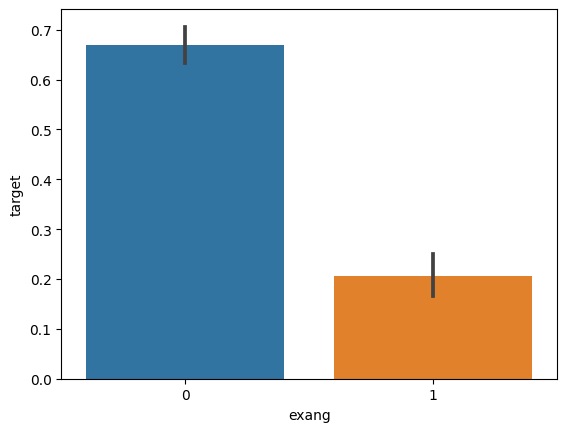

In [31]:
sns.barplot(x = 'exang', y = 'target', data=df);

У большей части людей, имеющих проблемы с сердцем, не наблюдалась стенокардия на фоне физ. нагрузок.

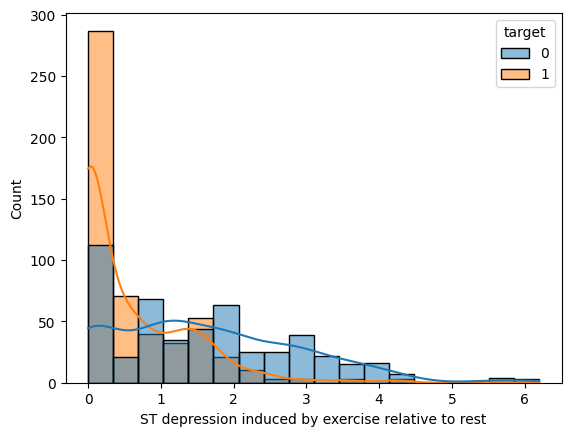

In [32]:
sns.histplot(x = 'oldpeak', hue = 'target', kde = True, data = df)
plt.xlabel('ST depression induced by exercise relative to rest')
plt.show()

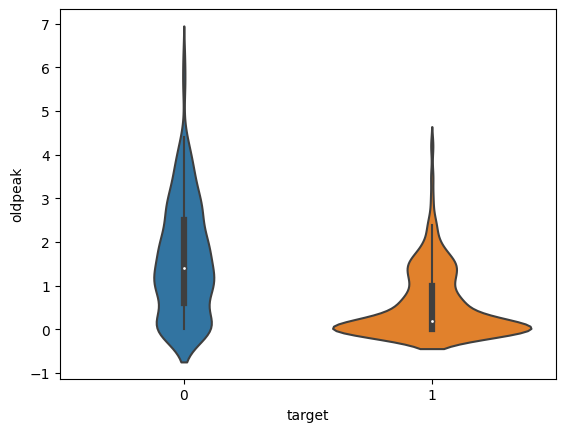

In [33]:
sns.violinplot(x = 'target', y = 'oldpeak', data = df);

In [34]:
pd.crosstab(df['slope'], df['target']).style.background_gradient()

target,0,1
slope,,
0,46,28
1,324,158
2,129,340


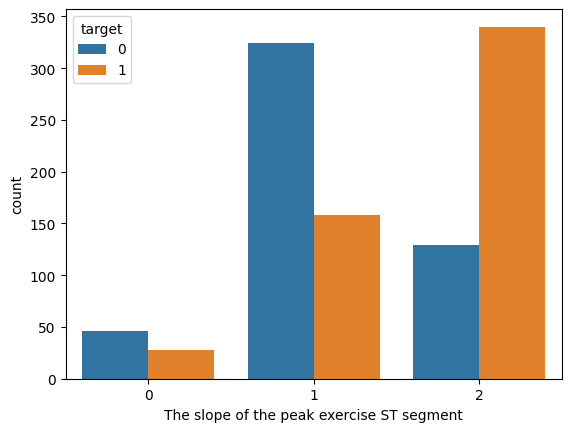

In [35]:
sns.countplot(x = 'slope', hue = 'target', data = df);
plt.xlabel('The slope of the peak exercise ST segment');

In [36]:
pd.crosstab(df['ca'], df['target']).style.background_gradient()

target,0,1
ca,,
0,163,415
1,160,66
2,113,21
3,60,9
4,3,15


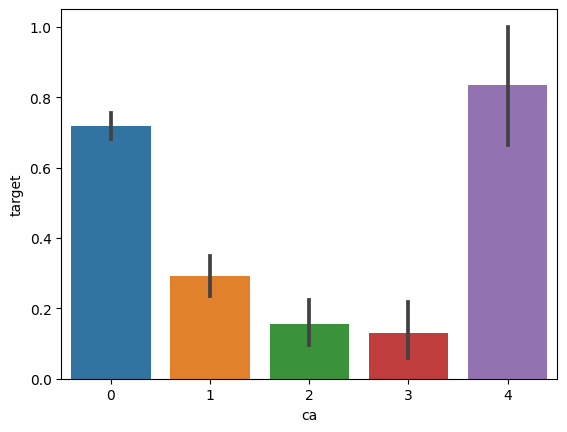

In [37]:
sns.barplot(x = 'ca', y = 'target', data=df);


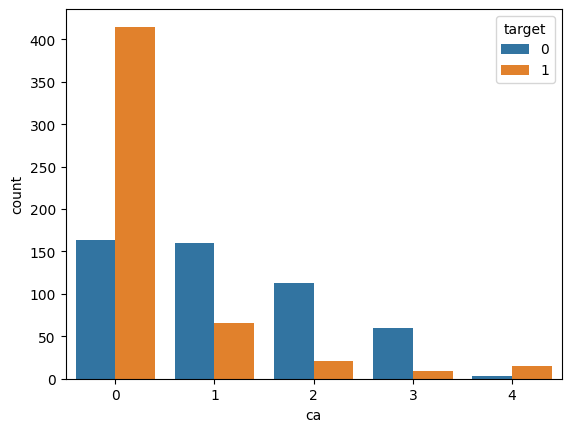

In [38]:
sns.countplot(x = 'ca', hue = 'target', data=df);

В процентном соотношении люди с больным сердцем, в основном, имеют либо 0, либо 4 крупных сосуда.

In [39]:
pd.crosstab(df['thal'], df['target']).style.background_gradient()

target,0,1
thal,,
0,4,3
1,43,21
2,132,412
3,320,90


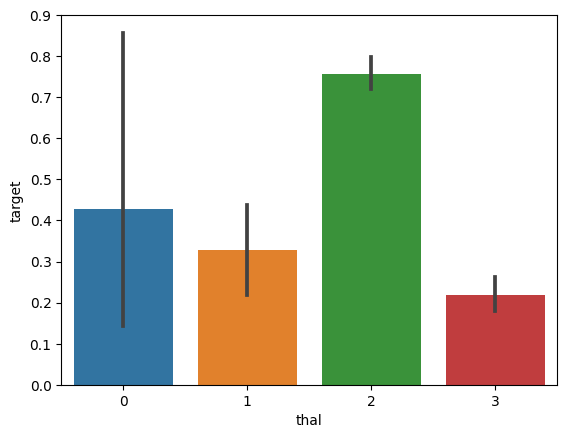

In [40]:
sns.barplot(x = 'thal', y = 'target', data=df);

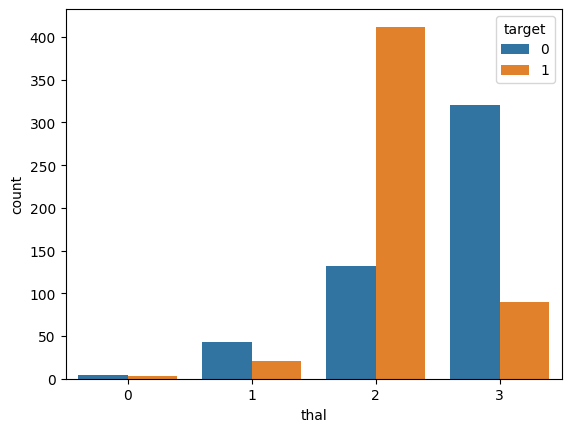

In [41]:
sns.countplot(x = 'thal', hue = 'target', data=df);

## Выводы



<li>Женщины в большей степени подвержены заболеваниям сердца.</li>
<li>Самый частый возраст больных от 40 до 55 лет.</li>
<li>Грудная боль типа 0, как правило не сопровождается проблемами с сердцем.</li>
<li>Самое частое кровяное давление среди больных 120 и 130 мм. рт. ст.</li>
<li>Холестерин выше 45 мг/дл свидетельствует о проблемах с сердцем.</li>
<li>Большая скорость работы сердца у людей до 55 лет может говорить о болезнях сердца.</li>
<li>Стенокардия на фоне физ. нагрузок не является основным признаком проблем с ердцем.</li>
<li>У людей с больным сердцем, в основном, не наблюдается крупных сосудов.</li>

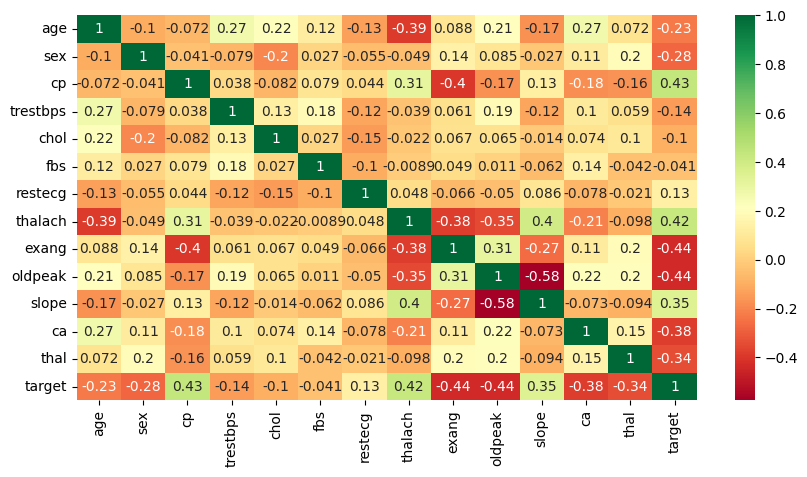

In [42]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

# 2. Feature Engineering

Разделим признак **age** на три категории:

In [43]:
df['age_category'] = 0
df.loc[df['age'] <= 45, 'age_category'] = 0
df.loc[(df['age'] > 45) & (df['age'] <= 61), 'age_category'] = 1
df.loc[(df['age'] > 61), 'age_category'] = 2
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2


Также разобьём признаки **trestbps**, **chol** и **thalach**:

In [44]:
df['bps_category'] = 0
df.loc[df['trestbps'] <= 120, 'bps_category'] = 0
df.loc[(df['trestbps'] > 120) & (df['trestbps'] <= 140), 'bps_category'] = 1
df.loc[(df['trestbps'] > 140), 'bps_category'] = 2

df['chol_category'] = 0
df.loc[df['chol'] <= 300, 'chol_category'] = 0
df.loc[(df['chol'] > 300), 'chol_category'] = 1

df['thalach_category'] = 0
df.loc[df['thalach'] <= 150, 'thalach_category'] = 0
df.loc[(df['thalach'] > 150), 'thalach_category'] = 1
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,thalach_category
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1,1,0,1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1,1,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2,2,0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1,2,0,1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2,1,0,0


In [45]:
df = df.drop(columns = ['age', 'trestbps', 'chol', 'thalach'])
df.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age_category,bps_category,chol_category,thalach_category
0,1,0,0,1,0,1.0,2,2,3,0,1,1,0,1
1,1,0,1,0,1,3.1,0,0,3,0,1,1,0,1
2,1,0,0,1,1,2.6,0,0,3,0,2,2,0,0
3,1,0,0,1,0,0.0,2,1,3,0,1,2,0,1
4,0,0,1,1,0,1.9,1,3,2,0,2,1,0,0


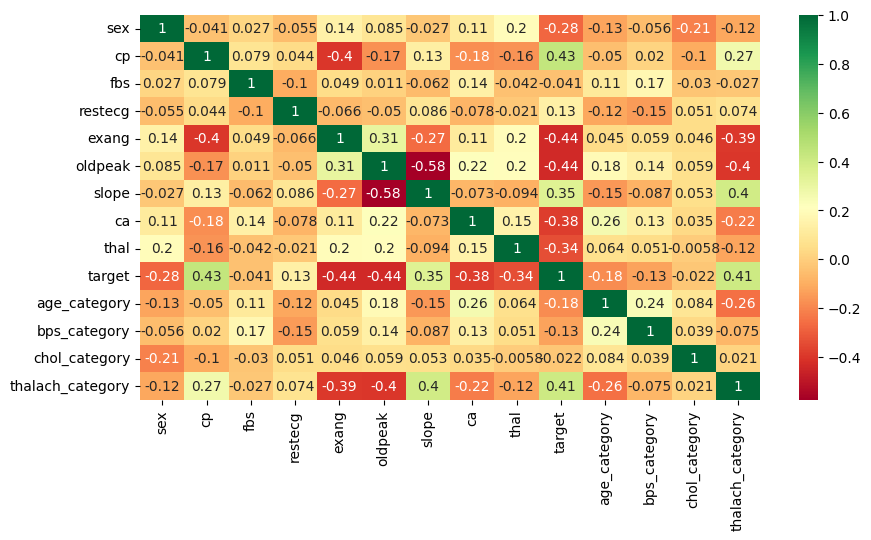

In [46]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

# 3. Logistic Regression Implementation

In [87]:
import math

class HandMadeLogReg:
    def __init__(self):    
        self.w = None
        self.alpha = 1
        self.treshold = 0.5
         
    def sigmoid(self, x):
        return 1 / (1 + math.exp(-x))

    def LogLoss(self, y, x):
        diff = np.array([self.sigmoid(i) for i in x.dot(self.w)]) - y
        return 1/len(x) * x.T.dot(diff)

    def gradient(self, y, x):
        L2 = np.array([2*x for x in self.w[:-1]] + [0.0])
        return self.LogLoss(y, x) + self.alpha*L2
     
    def fit(self, x, y, iterations=500):
        x_ones = np.c_[x, np.ones(len(x))]
        if self.w is None:
            self.w = np.ones(x_ones.shape[1])
        w_predict = np.zeros(x_ones.shape[1])
        for i in range(1, iterations):
            w_predict = self.w  
            grad = self.gradient(y, x_ones)
            self.w = self.w - 1/(i)*grad

    def predict(self, x):
        x_ones = np.c_[x, np.ones(len(x))]
        return np.array([1 if k >= self.treshold else 0 for k in [self.sigmoid(i) for i in x_ones.dot(self.w)]])
    
class HandMadeGridSearch:
    def __init__(self, model, x, y, alpha, treshold, scorrer, cv=5):
        self.model = model
        self.x = x
        self.y = y
        self.alpha = alpha
        self.treshold = treshold
        self.scorrer = scorrer
        self.cv = cv
        self.best_par = None
        
    def get_folds(self):
        result = [[], []]
        count = 0
        fl = int(len(self.x)/self.cv)
        for i in range(1, self.cv+1): 
            k = fl*i
            result[0].append(self.x[count:k])
            result[1].append(self.y[count:k])
            count = k       
        return result       
    
    def cross_validation(self):
        fl = self.get_folds()
        result, scores = [], []
        for i in range(len(fl)):
            self.model.w = None
            for j in range(len(fl)):
                if j == i:
                    continue
                self.model.fit(fl[0][j], fl[1][j])
            prediction = self.model.predict(fl[0][i])
            scores.append(self.scorrer(prediction, fl[1][i]))
        self.model.w = None
        return scores
    
    def best_search(self, refit=True):
        best_score, best_alpha, best_treshold = 0, 0, 0
        for alph in self.alpha:
            self.model.alpha = alph
            for th in self.treshold:
                self.model.treshold = th
                scores = self.cross_validation()
                score = sum(scores)/len(scores)
                if score > best_score:
                    best_score = score
                    best_alpha = alph
                    best_treshold = th
        model.alph = best_alpha
        model.treshold = best_treshold
        if refit:
            model.fit(self.x, self.y)
        return best_alpha, best_treshold
        

Обучим реализованные и встроенные модели на тестовых данных.

In [86]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

models = {'Log reg': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'SVM': SVC(),
          'Naive Bayes': GaussianNB(),
          'Decision Tree': DecisionTreeClassifier()}

max_name_len = max([len(i) for i in models.keys()])
models_params = {'Log reg': {'C': np.linspace(0.1**3, 3, 30)},
                 'KNN': {'n_neighbors': range (3, 8), 'weights': ['uniform', 'distance'], 'p':[1, 2]},
                 'SVM': {'C': np.linspace(0.1**3, 3, 30), 'kernel':['linear', 'poly', 'rbf','sigmoid'], "degree":range(1, 6), 'gamma':['scale', 'auto']},
                 'Naive Bayes': {'var_smoothing': np.logspace(0,-9, num=100)},
                 'Decision Tree': {"criterion": ['gini', 'entropy', 'log_loss'], "splitter": ['best', 'random'], 'class_weight':[None, 'balanced']}
                 }
best_models_params = []
accuracies = []
confusion_matrices = []
print("Best model's parameters:")
for name in models.keys():
    searcher = GridSearchCV(models[name], param_grid = models_params[name], scoring="accuracy", refit="accuracy")
    searcher.fit(X_train, y_train)
    prediction = searcher.predict(X_test)
    accuracies.append(accuracy_score(y_test, prediction))
    confusion_matrices.append(confusion_matrix(y_test, prediction))
    best_models_params.append(searcher.best_params_)
    print(name.ljust(max_name_len) + ": " + str(best_models_params[-1]))

Best model's parameters:
Log reg      : {'C': 0.5180689655172414}
KNN          : {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
SVM          : {'C': 2.7931724137931035, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly'}
Naive Bayes  : {'var_smoothing': 0.0657933224657568}
Decision Tree: {'class_weight': None, 'criterion': 'entropy', 'splitter': 'random'}


In [88]:

model = HandMadeLogReg()
searcher = HandMadeGridSearch(model=model,
                               x=X_train,
                               y=y_train,
                               alpha=np.linspace(0.1**3, 3, 30),
                               treshold=np.linspace(0.1**3, 3, 30),
                               scorrer=accuracy_score)
Log_reg_best_params = searcher.best_search()
best_models_params.append({'alpha': Log_reg_best_params[0], 'treshold':Log_reg_best_params[1]})
my_pred = model.predict(X_test)
accuracies.append(accuracy_score(my_pred, y_test))
confusion_matrices.append(confusion_matrix(y_test, my_pred))
print("My Logistic regression" + ": " + str(Log_reg_best_params[-1]))

My Logistic regression: 0.5180689655172414


Сравним accuracy моделей.

                    Model  Accuracy
5  My Logistic regression  0.532468
0                 Log reg  0.824675
3             Naive Bayes  0.834416
2                     SVM  0.964286
4           Decision Tree  0.970779
1                     KNN  1.000000


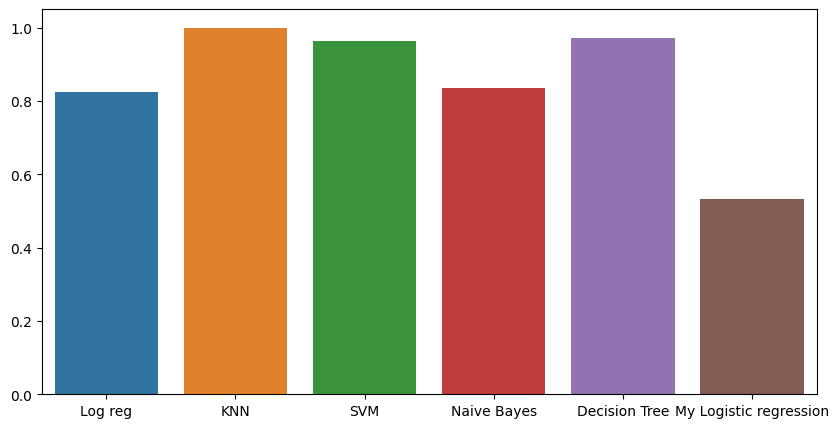

In [91]:
data = {
    'Model': ['Log reg', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree',  'My Logistic regression'],
    'Accuracy': accuracies
}
frame = pd.DataFrame(data = data)
print(frame.sort_values(by="Accuracy"))
sns.barplot(x=['Log reg', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree',  'My Logistic regression'], y=accuracies)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Матрица ошибок.

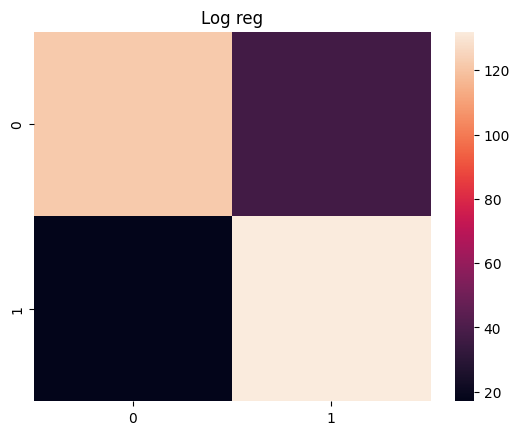

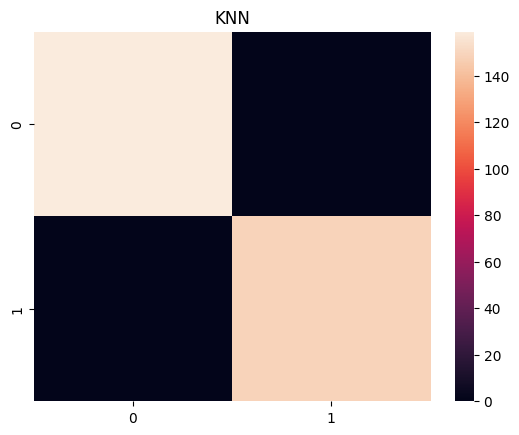

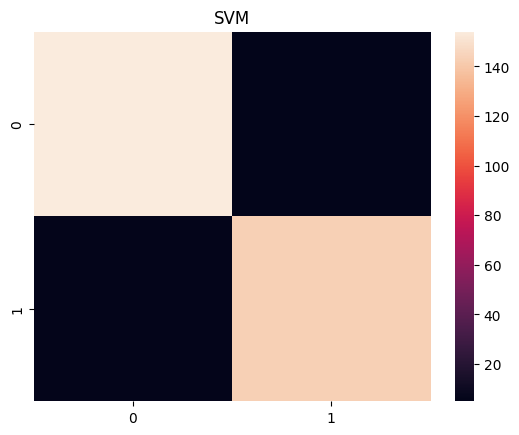

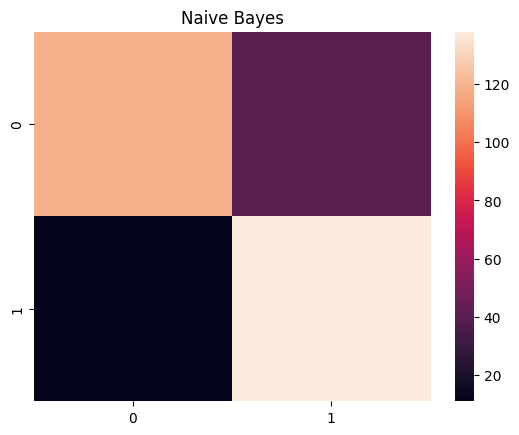

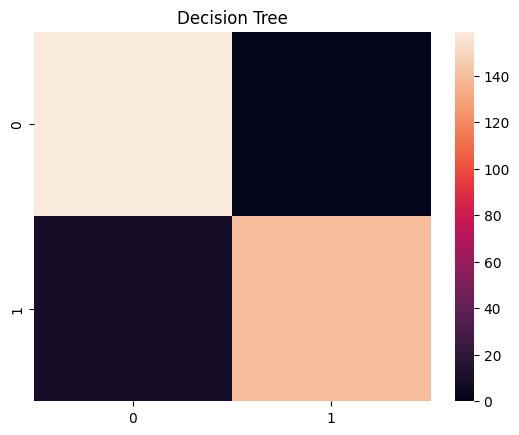

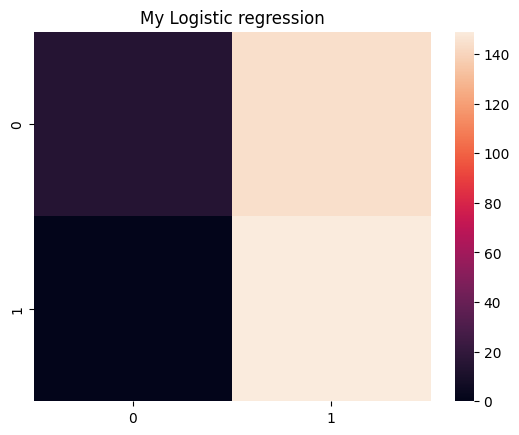

In [93]:
for i in range(len(confusion_matrices)):
    sns.heatmap(confusion_matrices[i], fmt='d', annot_kws={"size": 24})
    plt.title(label=['Log reg', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree',  'My Logistic regression'][i])
    plt.show()

Выводы:

1. Лучшую точность показала модель Decision Tree.
2. Методы KNN и Svm практически совпали в точности с Decision Tree.
3. Методы Logistic Regression и Naive Bayes имеют схожую точность.
4. Реализованный вручную метод Logistic Regression показал минимальную точность.